<a href="https://colab.research.google.com/github/jchou03/art_era_ai/blob/main/art_era_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA UPLOAD

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
from google.colab import files
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
import random
from random import sample
import zipfile
from PIL import Image
import os
import numpy as np
import seaborn as sns


drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Data/art_era_ai_df.csv')
df.info()


Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 7 columns):
 #   Column                                                                                     Non-Null Count  Dtype 
---  ------                                                                                     --------------  ----- 
 0   https://www.artic.edu/iiif/2/a28e4e8f-f072-092a-52f9-b165c97c7a0a/full/600,/0/default.jpg  699 non-null    int64 
 1   Title                                                                                      699 non-null    object
 2   Year                                                                                       699 non-null    int64 
 3   Title_URL                                                                                  699 non-null    object
 4   Image                                                                                      699 non-null    object
 5   Artist                          

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import re
def extract_year_from_title(title):
    # Use regular expressions to find a 4-digit number in the title
    match = re.search(r'\b\d{4}\b', title)
    if match:
        year = int(match.group(0))
        return year
    else:
        match = re.search(r'(\d{4})s', title)
        if match:
          year = int(match.group(1))
          return year
        else:
          print("fail")


def getdecade(df):
  decade = []
  for i in range(len(df)):
    (title, year) = df.loc[i, "Title"], df.loc[i, "Year"]
    if year != 1972:
      decadeval = year - (year % 10)
      #print(decadeval, year)
      decade.append(decadeval)
    else:
      newyear = extract_year_from_title(title)
      decadeval = newyear - (newyear % 10)
      #print(decadeval, year)
      decade.append(decadeval)
  return decade


df['Decade'] = getdecade(df)
df = df.replace(4650, 1950)

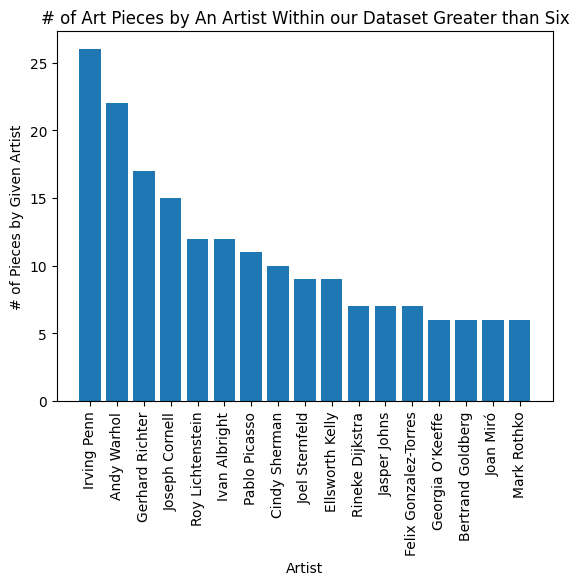

In [3]:
grouped_data = df['Artist'].value_counts().reset_index()
grouped_data.columns = ['Group', 'Count']
grouped_data = grouped_data[grouped_data['Count'] >= 6]
plt.bar(grouped_data['Group'], grouped_data['Count'])
plt.xlabel('Artist')
plt.xticks(rotation=90)
plt.ylabel('# of Pieces by Given Artist')
plt.title('# of Art Pieces by An Artist Within our Dataset Greater than Six')
plt.show()


<BarContainer object of 8 artists>

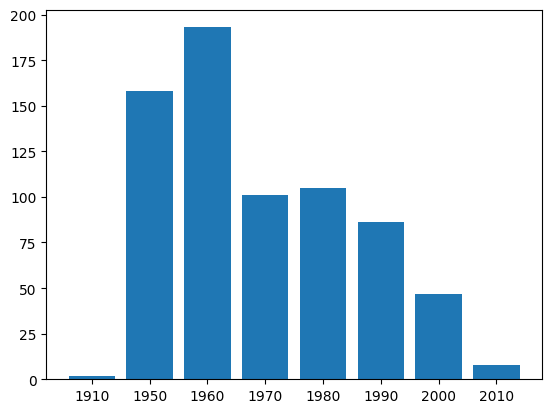

In [4]:
#df.groupby(['Decade']).count()
x = ['1910', '1950', '1960', '1970', '1980', '1990', '2000', '2010']
y = [2, 158, 193, 101, 105, 86, 47, 8]
plt.bar(x, y)

In [5]:
labels_dict = {
    1910: 0,
    1950: 1,
    1960: 2,
    1970: 3,
    1980: 4,
    1990: 5,
    2000: 6,
    2010: 7
}

In [6]:
from pandas.core.frame import DataFrame
from IPython.display import HTML
def Create_Link(df):
  i = 0
  for x in range(len(df)):
    input = df.loc[x, "Image"]
    #index = df.loc[x, "index"]
    html = f'<a href={input}>{i}</a>'
    df = df.replace(input, html)
    i += 1
  return df


In [7]:
labels = df["Decade"].to_list()
images = df['Image']
print(type(labels))
len(labels)

<class 'list'>


699

In [ ]:
"""sample = sample(list(images), 10)"""

'sample = sample(list(images), 10)'

In [ ]:
def get_largest(images):
  imageone = io.imread(images[0])
  maxwidth =  imageone.shape[1]
  maxheight = imageone.shape[0]
  for x in (images):
    image = io.imread(x)
    width =  image.shape[1]
    height = image.shape[0]
    if width > maxwidth:
        maxwidth = width
    if height > maxheight:
        maxheight = height
  return maxwidth, maxheight

def get_smallest(images):
  imageone = io.imread(images[0])
  minwidth =  imageone.shape[1]
  minheight = imageone.shape[0]
  for x in (images):
    image = io.imread(x)
    width =  image.shape[1]
    height = image.shape[0]
    if width < minwidth:
        minwidth = width
    if height < minheight:
        minheight = height
  return minwidth, minheight


In [8]:
def resize(sample):
  crop_img_list = []
  for i, url in enumerate(sample):
    try:
      image = io.imread(url)
      # print("shape is: " + str(image.shape))
      width =  image.shape[1]
      height = image.shape[0]
      if width == height:
          #cv2_imshow(cv.resize(image, (255, 255), interpolation = cv.INTER_AREA)
          crop_img_list.append(cv.resize(image, (255, 255), interpolation = cv.INTER_AREA))
          #print(image.shape)
          #print("here")
      else:
        mid_x, mid_y = int(width/2), int(height/2)
        if 255 < width:
            crop_width = int(255/2)
            if 255 < height:
                crop_height = int(255/2)
                crop_img = image[mid_y-crop_height:mid_y+crop_height, mid_x-crop_width:mid_x+crop_width]
            else:
                crop_height = int(crop_height/2)
                crop_img = image[mid_y-crop_height:mid_y+crop_height, mid_x-crop_width:mid_x+crop_width]
        else:
            if 255 < height:
                crop_width = int(crop_width/2)
                crop_height = int(255/2)
                crop_img = image[mid_y-crop_height:mid_y+crop_height, mid_x-crop_width:mid_x+crop_width]
            else:
                crop_width = int(crop_width/2)
                crop_height = int(crop_height/2)
                crop_img = image[mid_y-crop_height:mid_y+crop_height, mid_x-crop_width:mid_x+crop_width]
        crop_img = cv.resize(crop_img, (255, 255), interpolation = cv.INTER_AREA)
        # print("crop_image shape: " + str(crop_img.shape))
        crop_img_list.append(crop_img)
        #print(image.shape)
    except:
      print("Issue with resizing image: " + str(url))
      # remove the label from labels
      labels.pop(i)
  return crop_img_list
    #cv2_imshow(crop_img)
    #print('\n')


"""result = resize(sample)
cv2_imshow(result[2])"""

'result = resize(sample)\ncv2_imshow(result[2])'

In [ ]:
def invert_img(sample):
  for url in sample:
    image = io.imread(url)
    cv2_imshow(image)
    image = ~image
    cv2_imshow(image)



In [ ]:
def BW_convert(sample):
  for url in sample:
    image = io.imread(url)
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    cv2_imshow(gray)


In [ ]:
def HSV_convert(sample):
  for url in sample:
    image = io.imread(url)
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    cv2_imshow(hsv)



In [ ]:
def sampling(images):
  for x in images:
      image = x
      cv2_imshow(image)



In [9]:
result = resize(images[0:10])
print(labels[0:10])
sampling(result)

[1970, 1990, 1960, 1950, 1950, 1950, 1960, 1970, 1970, 1950]


NameError: ignored

In [10]:
# resize all images
resized_imgs = resize(images)
# img_array = np.array(img_array)

699
(255, 255, 3)
255
255
3
shape error with image 130
(255, 255)


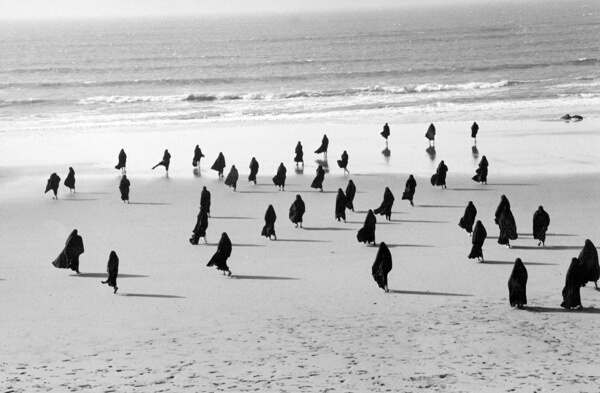

shape error with image 366
(255, 255)


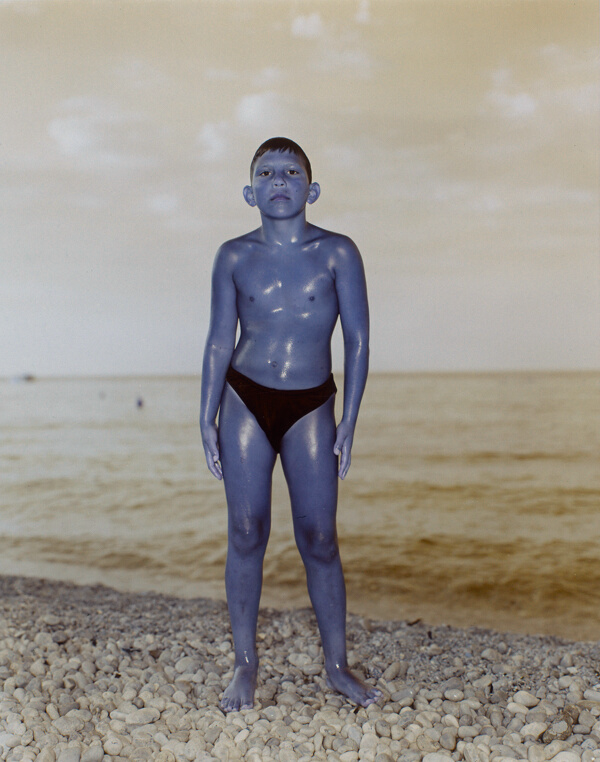

shape error with image 482
(255, 255)


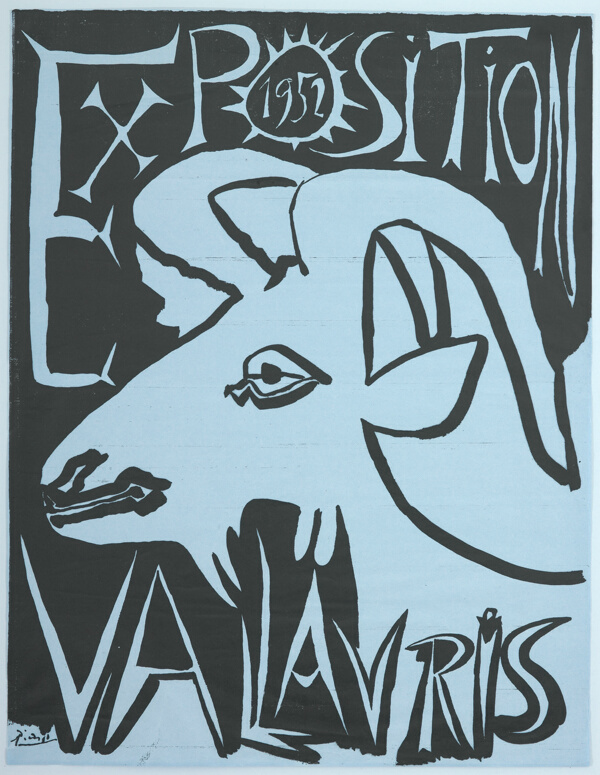

(696, 255, 255, 3)


In [11]:
# print(img_array)
# convert to np array
print(len(resized_imgs))
print(resized_imgs[0].shape)
print(len(resized_imgs[0]))
print(len(resized_imgs[0][0]))
print(len(resized_imgs[0][0][0]))
for i, img in enumerate(resized_imgs):
  if img.shape != (255, 255, 3):
    resized_imgs.pop(i)
    labels.pop(i)
    print("shape error with image " + str(i))
    print(img.shape)
    # print(img)
    # image = io.imread(url)
    cv2_imshow(io.imread(images[i]))
img_array = np.array(resized_imgs)
print(img_array.shape)

In [12]:
# convert labels to dict ids
print(type(labels))

transformed_labels = list(map(lambda x: labels_dict[x], labels))
# print(type(transformed_labels))
print(len(transformed_labels))
# print(transformed_labels)

<class 'list'>
696


(255, 255, 3)


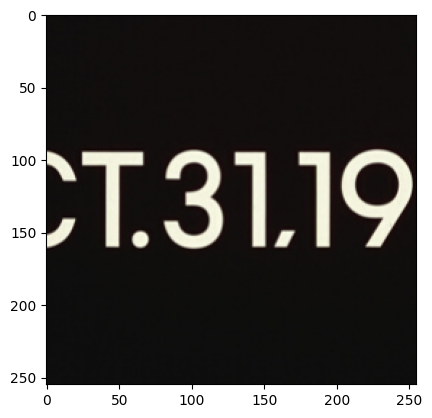

In [13]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

x_train, x_test, y_train, y_test = train_test_split(img_array, transformed_labels)

print(x_train[0].shape)

x_train = x_train/255.0
x_test = x_test/255.0

"""x_train = x_train.reshape((-1,28,28, 3)) #NOT SURE IF WE NEED
x_test = x_test.reshape((-1,28,28, 3)) #NOT SURE IF WE NEED
"""

plt.imshow(x_train[0])

#ERROR OUT OF BOUNDS BC DIMENSIONS AREN'T RIGHT
num_classes = 8
# y_train = pd.DataFrame(data=y_train)
# y_test = pd.DataFrame(data=y_test)
# y_train = pd.DataFrame(index=np.arange(700))
# y_test = pd.DataFrame(index=np.arange(700))
y_train = keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes=num_classes)



#### Architecture One

In [14]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
#input_shape = (-1,28,28)
#input_shape = (28,28,1)


model1 = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 253, 253, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dropout (Dropout)           (None, 246016)            0

In [19]:
# running architecture 1
batch_size = 128
epochs = 15
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
4/4 [==============================] - 8s 959ms/step - loss: 1.2237 - accuracy: 0.2431 - val_loss: 0.6454 - val_accuracy: 0.2830
Epoch 2/15
4/4 [==============================] - 1s 219ms/step - loss: 0.5604 - accuracy: 0.2537 - val_loss: 0.4290 - val_accuracy: 0.2075
Epoch 3/15
4/4 [==============================] - 1s 219ms/step - loss: 0.4268 - accuracy: 0.2154 - val_loss: 0.3662 - val_accuracy: 0.2075
Epoch 4/15
4/4 [==============================] - 1s 224ms/step - loss: 0.3692 - accuracy: 0.2026 - val_loss: 0.3753 - val_accuracy: 0.2264
Epoch 5/15
4/4 [==============================] - 1s 221ms/step - loss: 0.3559 - accuracy: 0.2665 - val_loss: 0.3539 - val_accuracy: 0.2075
Epoch 6/15
4/4 [==============================] - 1s 214ms/step - loss: 0.3377 - accuracy: 0.2857 - val_loss: 0.3620 - val_accuracy: 0.2642
Epoch 7/15
4/4 [==============================] - 1s 214ms/step - loss: 0.3300 - accuracy: 0.3198 - val_loss: 0.3526 - val_accuracy: 0.2264
Epoch 8/15
4/4 [====

In [20]:
# running architecture 1, more epochs
batch_size = 128
epochs = 30
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/30
4/4 [==============================] - 2s 289ms/step - loss: 0.2538 - accuracy: 0.5842 - val_loss: 0.4295 - val_accuracy: 0.3208
Epoch 2/30
4/4 [==============================] - 1s 189ms/step - loss: 0.2237 - accuracy: 0.6269 - val_loss: 0.4077 - val_accuracy: 0.3208
Epoch 3/30
4/4 [==============================] - 1s 193ms/step - loss: 0.2038 - accuracy: 0.7527 - val_loss: 0.4119 - val_accuracy: 0.2264
Epoch 4/30
4/4 [==============================] - 1s 214ms/step - loss: 0.1844 - accuracy: 0.7463 - val_loss: 0.4363 - val_accuracy: 0.2453
Epoch 5/30
4/4 [==============================] - 1s 228ms/step - loss: 0.1707 - accuracy: 0.7719 - val_loss: 0.4306 - val_accuracy: 0.1698
Epoch 6/30
4/4 [==============================] - 1s 218ms/step - loss: 0.1541 - accuracy: 0.8102 - val_loss: 0.4639 - val_accuracy: 0.1887
Epoch 7/30
4/4 [==============================] - 1s 214ms/step - loss: 0.1398 - accuracy: 0.8380 - val_loss: 0.4756 - val_accuracy: 0.1887
Epoch 8/30
4/4 [====

## Architecture Two

In [26]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

model2 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', input_shape=(255, 255, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

"""model2.summary()"""



'model2.summary()'

In [27]:
# running architecture 2
batch_size = 128
epochs = 15
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
4/4 [==============================] - 3s 337ms/step - loss: 0.5269 - accuracy: 0.2026 - val_loss: 0.3685 - val_accuracy: 0.2830
Epoch 2/15
4/4 [==============================] - 1s 253ms/step - loss: 0.4018 - accuracy: 0.2687 - val_loss: 0.3329 - val_accuracy: 0.2830
Epoch 3/15
4/4 [==============================] - 1s 245ms/step - loss: 0.3650 - accuracy: 0.2751 - val_loss: 0.3346 - val_accuracy: 0.2830
Epoch 4/15
4/4 [==============================] - 1s 249ms/step - loss: 0.3489 - accuracy: 0.2729 - val_loss: 0.3359 - val_accuracy: 0.2830
Epoch 5/15
4/4 [==============================] - 1s 265ms/step - loss: 0.3478 - accuracy: 0.2708 - val_loss: 0.3328 - val_accuracy: 0.2830
Epoch 6/15
4/4 [==============================] - 1s 281ms/step - loss: 0.3442 - accuracy: 0.2708 - val_loss: 0.3299 - val_accuracy: 0.2830
Epoch 7/15
4/4 [==============================] - 1s 276ms/step - loss: 0.3388 - accuracy: 0.2729 - val_loss: 0.3287 - val_accuracy: 0.2830
Epoch 8/15
4/4 [====

In [23]:
# running architecture 2, more epochs
batch_size = 128
epochs = 30
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/30
4/4 [==============================] - 4s 535ms/step - loss: 0.3376 - accuracy: 0.2900 - val_loss: 0.3444 - val_accuracy: 0.1887
Epoch 2/30
4/4 [==============================] - 1s 356ms/step - loss: 0.3327 - accuracy: 0.2985 - val_loss: 0.3341 - val_accuracy: 0.3019
Epoch 3/30
4/4 [==============================] - 1s 316ms/step - loss: 0.3285 - accuracy: 0.2751 - val_loss: 0.3445 - val_accuracy: 0.2830
Epoch 4/30
4/4 [==============================] - 1s 310ms/step - loss: 0.3262 - accuracy: 0.2942 - val_loss: 0.3402 - val_accuracy: 0.2453
Epoch 5/30
4/4 [==============================] - 1s 284ms/step - loss: 0.3234 - accuracy: 0.3070 - val_loss: 0.3374 - val_accuracy: 0.2453
Epoch 6/30
4/4 [==============================] - 1s 265ms/step - loss: 0.3204 - accuracy: 0.3220 - val_loss: 0.3444 - val_accuracy: 0.2830
Epoch 7/30
4/4 [==============================] - 1s 264ms/step - loss: 0.3168 - accuracy: 0.3326 - val_loss: 0.3518 - val_accuracy: 0.2642
Epoch 8/30
4/4 [====

In [ ]:
batch_size = 128
epochs = 30
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

In [37]:
"""from sklearn.metrics import classification_report

class_names = ["1910", "1950", "1960", "1970", "1980", "1990", "2000", "2010"]

# Compile the model with metrics=["accuracy"] if not already compiled
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Predict on the test set
y_pred = model2.predict(x_test)

# Convert predictions to binary values
y_pred_binary = (y_pred > 0.5).astype(int)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred_binary, target_names=class_names)

# Print the classification report
print(classification_rep)"""

6/6 [==============================] - 0s 26ms/step
              precision    recall  f1-score   support

        1910       0.00      0.00      0.00         0
        1950       0.00      0.00      0.00        37
        1960       0.50      0.08      0.14        51
        1970       0.00      0.00      0.00        24
        1980       0.00      0.00      0.00        27
        1990       0.00      0.00      0.00        23
        2000       0.00      0.00      0.00         9
        2010       0.00      0.00      0.00         3

   micro avg       0.50      0.02      0.04       174
   macro avg       0.06      0.01      0.02       174
weighted avg       0.15      0.02      0.04       174
 samples avg       0.02      0.02      0.02       174



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Architecture Three

## Architecture Four

In [18]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.models import Model
from tensorflow.keras import layers
# preprocess_input subtracts pixel mean values from the inputs,
# which is what VGG16 expected
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow_datasets as tfds


model4 = VGG16(include_top=False, input_shape=(255, 255, 3)) # we'll replace the "top" with our own layers
for layer in model4.layers:
    layer.trainable = False  # these won't learn
# add new classifier layers
flat = layers.Flatten()(model4.layers[-1].output) # connect to last layer of VGG
drop1 = layers.Dropout(0.5)(flat)
cls = layers.Dense(128, activation='relu')(drop1)
drop2 = layers.Dropout(0.5)(cls)
output = layers.Dense(num_classes, activation="sigmoid")(drop2)  #SIGMOID CHANGE
# define new model
model4 = Model(inputs=model4.inputs, outputs=output)


# compile model

model4.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy']) #BINARY CROSS CHANGE

#FIT
model4.fit(x_train, y_train, batch_size=128, epochs=30, validation_split=0.1)

Epoch 1/30
4/4 [==============================] - 43s 7s/step - loss: 0.8350 - accuracy: 0.1493 - val_loss: 0.5585 - val_accuracy: 0.1887
Epoch 2/30
4/4 [==============================] - 3s 725ms/step - loss: 0.6539 - accuracy: 0.2601 - val_loss: 0.3727 - val_accuracy: 0.2830
Epoch 3/30
4/4 [==============================] - 3s 823ms/step - loss: 0.4427 - accuracy: 0.2559 - val_loss: 0.3860 - val_accuracy: 0.1132
Epoch 4/30
4/4 [==============================] - 3s 819ms/step - loss: 0.3732 - accuracy: 0.3241 - val_loss: 0.3842 - val_accuracy: 0.2830
Epoch 5/30
4/4 [==============================] - 3s 820ms/step - loss: 0.3616 - accuracy: 0.3134 - val_loss: 0.3472 - val_accuracy: 0.2830
Epoch 6/30
4/4 [==============================] - 3s 825ms/step - loss: 0.3115 - accuracy: 0.4307 - val_loss: 0.3371 - val_accuracy: 0.3585
Epoch 7/30
4/4 [==============================] - 3s 856ms/step - loss: 0.2924 - accuracy: 0.4542 - val_loss: 0.3391 - val_accuracy: 0.3208
Epoch 8/30
4/4 [======

##Architecture Five

In [29]:
model5 = keras.Sequential(
    [
        layers.Input(shape=(255, 255, 3)),
        layers.RandomFlip("horizontal"),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dense(num_classes, activation='sigmoid'),
    ]
)

model5.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_6 (RandomFlip)  (None, 255, 255, 3)       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 253, 253, 32)      896       
                                                                 
 batch_normalization_4 (Bat  (None, 253, 253, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 126, 126, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 124, 124, 64)      18496     
                                                                 
 batch_normalization_5 (Bat  (None, 124, 124, 64)     

In [ ]:
batch_size = 128
epochs = 15
model5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model5.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [30]:
batch_size = 128
epochs = 50
model5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model5.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/50
4/4 [==============================] - 5s 541ms/step - loss: 4.2441 - accuracy: 0.1535 - val_loss: 0.4403 - val_accuracy: 0.2830
Epoch 2/50
4/4 [==============================] - 1s 376ms/step - loss: 2.4640 - accuracy: 0.2793 - val_loss: 0.4317 - val_accuracy: 0.2453
Epoch 3/50
4/4 [==============================] - 2s 381ms/step - loss: 1.7885 - accuracy: 0.2772 - val_loss: 0.5352 - val_accuracy: 0.1887
Epoch 4/50
4/4 [==============================] - 2s 382ms/step - loss: 1.3453 - accuracy: 0.4051 - val_loss: 0.5512 - val_accuracy: 0.2264
Epoch 5/50
4/4 [==============================] - 1s 379ms/step - loss: 1.1954 - accuracy: 0.3923 - val_loss: 0.4478 - val_accuracy: 0.1887
Epoch 6/50
4/4 [==============================] - 2s 383ms/step - loss: 1.1406 - accuracy: 0.4563 - val_loss: 0.4821 - val_accuracy: 0.1887
Epoch 7/50
4/4 [==============================] - 1s 354ms/step - loss: 0.9580 - accuracy: 0.4883 - val_loss: 0.5034 - val_accuracy: 0.2453
Epoch 8/50
4/4 [====